In [16]:
# import modules
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

# from functions.immediatecharging import get_EVimmediateCharge
# from functions.optimization import Optimization
from functions.readcsv import readData
# from functions import plotting

In [17]:
window_length = 6
projName = 'Full3'
projPath = './results/' + projName

EVChargingV2B_6 = np.load(projPath + '/npyFiles/EVchargingV2B_'+str(window_length)+'.npy')


In [18]:
BattInfo = pd.read_csv("./Data/Battery_info.csv")
FullData = pd.read_csv("./Data/Full_Data.csv")

a_vt = BattInfo['Availability']
t_a_v = BattInfo['Arrival_hour']
t_d_v = BattInfo['Departure_hour']
SOC_a_v = BattInfo['Arrival_SOC']
SOC_d_v = BattInfo['Departure_SOC']

D_B_t = FullData['energy (kWh)']
Temp = FullData['Temperature,T (deg)']
Rad = FullData['Radiation Intensity, I']
CarbInt = FullData['Carbon Intensity (kgC02eq/kWh)']
c_G2B_t = FullData['Building Electricity Cost (NTD/kWh)']
c_G2V_t = FullData['Vehicle Electricity Cost (NTD/kWh)']
S_R_t = FullData['PV Generation (kWh)']

In [19]:
D_B_t

0       10.48
1       10.92
2        9.96
3       10.42
4       11.56
        ...  
2923    91.08
2924    86.43
2925    69.23
2926    13.95
2927    11.30
Name: energy (kWh), Length: 2928, dtype: float64

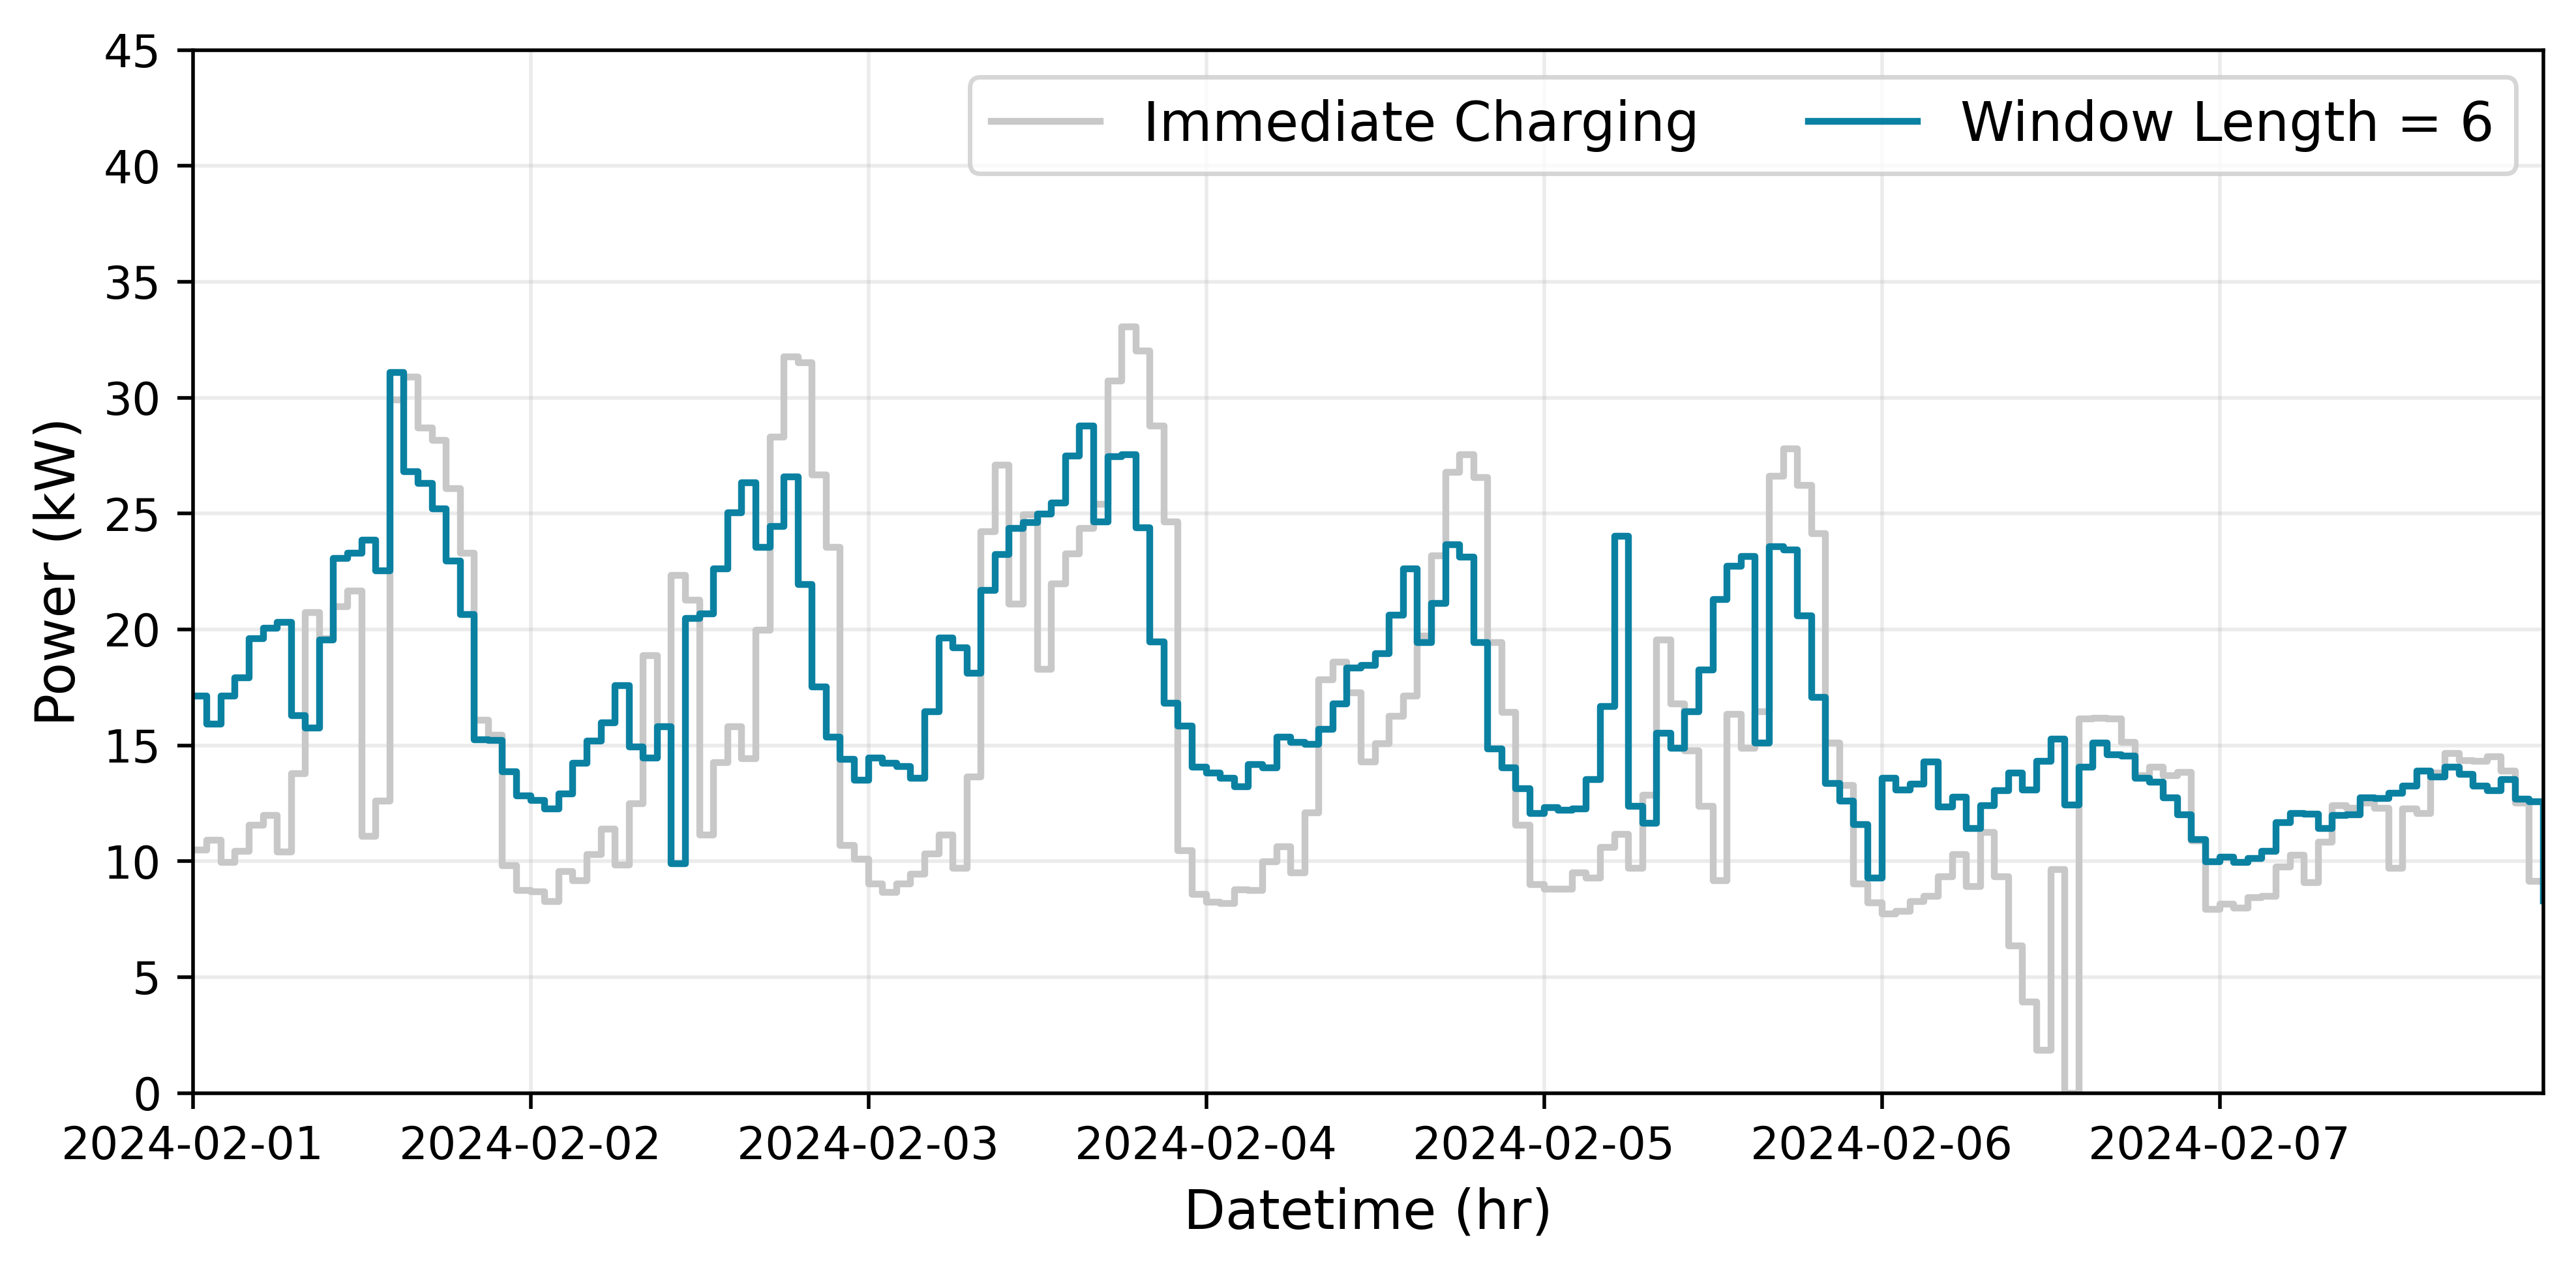

In [20]:
fig = plt.figure(dpi=500, figsize=(8,4))

days = 7

date_start = pd.to_datetime('2024-02-01')
date_range = pd.date_range(start = date_start, end= '2024-02-07 23:00', freq='h')

plt.grid(alpha=0.25)
# plt.step(date_range,np.array(BldgEnCon[:days*24]),
#          color = 'black', where='post', label = 'Immediate Charging')
plt.step(date_range,np.maximum(np.array(D_B_t[:days*24])-np.array(S_R_t[:days*24]),0),
         color = '#c8c8c8', where='post', label = 'Immediate Charging')
plt.step(date_range,np.maximum(np.array(D_B_t[:days*24])-np.array(S_R_t[:days*24])+np.array(EVChargingV2B_6[:days*24]),0),
         color = '#0b81a2', where='post', label = 'Window Length = 6')


# date_start = datetime.date(2020, 1, 1)
# date_end = datetime.date(2020, 1, 8)

plt.axis([date_range[0], date_range[-1], 0, 45])
# plt.title('Final Grid Demand ', fontsize=12)
plt.xlabel('Datetime (hr)', fontsize=12)
plt.ylabel('Power (kW)', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)  # Sets the font size for both x and y ticks

plt.legend(fontsize=12, loc='best', ncols = 2)
plt.tight_layout()
plt.savefig(projPath + '/figures/exemplaryweek.png', format='png',bbox_inches = 'tight')
plt.show()

In [29]:
battery_indi = [[0]*24 for _ in range(6)]  # Create separate lists
battery_indi[0][0] = 8  # Set only the first element to 8
print(battery_indi)

[[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
